# 숙제( 다중 선형 회귀분석)
    목표변수 FAT를 예측하기 위한 파생변수 (BMI 등)를 생성하여 회귀분석을 실시하고 결과를 해석하라.
    (BMI 계산시, WEIGHT는 파운드 (1lb = 0.45kg), HEIGHT는 인치(1inch = 2.54cm) 이므로 변환하여 사용한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols

#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

#선형모델
import statsmodels.formula.api as smf

# 평가 함수
from statsmodels.tools.eval_measures import rmse

# 정규성검정
from statsmodels.stats.stattools import omni_normtest

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
mpl.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False

### Step1. Import Dataset

In [3]:
df = pd.read_csv("data/BigData/체질검사.csv")
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


결측치는 없는 것으로 확인됨

In [4]:
df.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
FAT        252 non-null float64
AGE        252 non-null int64
WEIGHT     252 non-null float64
HEIGHT     252 non-null float64
NECK       252 non-null float64
CHEST      252 non-null float64
ABDOMEN    252 non-null float64
HIP        252 non-null float64
THIGH      252 non-null float64
KNEE       252 non-null float64
ANKLE      252 non-null float64
BICEPS     252 non-null float64
FOREARM    252 non-null float64
WRIST      252 non-null float64
dtypes: float64(13), int64(1)
memory usage: 27.6 KB


##### BMI 지수 =703* 몸무게(lb) / 신장(in)^2
    이 데이터의 신장과 몸무게의 단위는 인치와 파운드이기 때문에
    위의 식을 이용하여 BMI지수를 계산한 뒤 원본데이터에 새로운 컬럼으로 추가한다.
    

In [6]:
df['BMI'] = 703*df['WEIGHT']/pow(df['HEIGHT'],2)

In [7]:
df.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.939653
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.557513
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,18.015895
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,23.033400
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,25.091825
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.331864
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,165.601839


BMI가 WEIGHT와 HEIGHT로 이루어져있기 때문에 WEIGHT와 HEIGHT는 제거한 후에 데이터를 분석하자.

In [8]:
df.drop(['WEIGHT','HEIGHT'],axis=1,inplace=True)
df.describe()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.939653
std,8.368740,12.602040,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.557513
min,0.000000,22.000000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,18.015895
25%,12.475000,35.750000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,23.033400
50%,19.200000,43.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,25.091825
75%,25.300000,54.000000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.331864
max,47.500000,81.000000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,165.601839


In [9]:
df.columns

Index(['FAT', 'AGE', 'NECK', 'CHEST', 'ABDOMEN', 'HIP', 'THIGH', 'KNEE',
       'ANKLE', 'BICEPS', 'FOREARM', 'WRIST', 'BMI'],
      dtype='object')

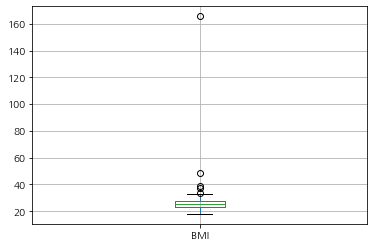

In [10]:
df.boxplot("BMI")

BMI 데이터를 Boxplot으로 그려본 결과, 이상치가 발견되었다.

### BMI > 40 인 데이터는 이상치로 판단하여 제거함

In [11]:
df=df[df["BMI"]<40]

In [12]:
df.sample(2)

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
50,18.2,44,39.2,101.9,93.2,100.6,58.9,39.7,23.1,31.4,28.4,18.8,26.161017
183,24.5,52,39.4,106.8,100.0,105.0,63.9,39.2,22.9,35.7,30.4,19.2,27.208829


In [13]:
df.reset_index(inplace=True) #열 삭제 후 reset index
df.head()

,index,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.264561
1,2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.630774
2,3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,24.026544
3,4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.587158
4,5,24.2,40,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,29.016684


### 변수 간의 경향성 파악 - 그래프 분석

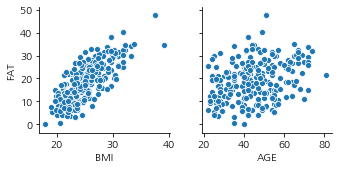

In [14]:
sns.pairplot(df, y_vars="FAT", x_vars=['BMI','AGE'])

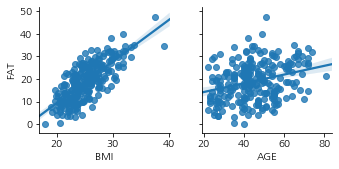

In [15]:
sns.pairplot(df, y_vars="FAT", x_vars=['BMI','AGE'],kind="reg" )

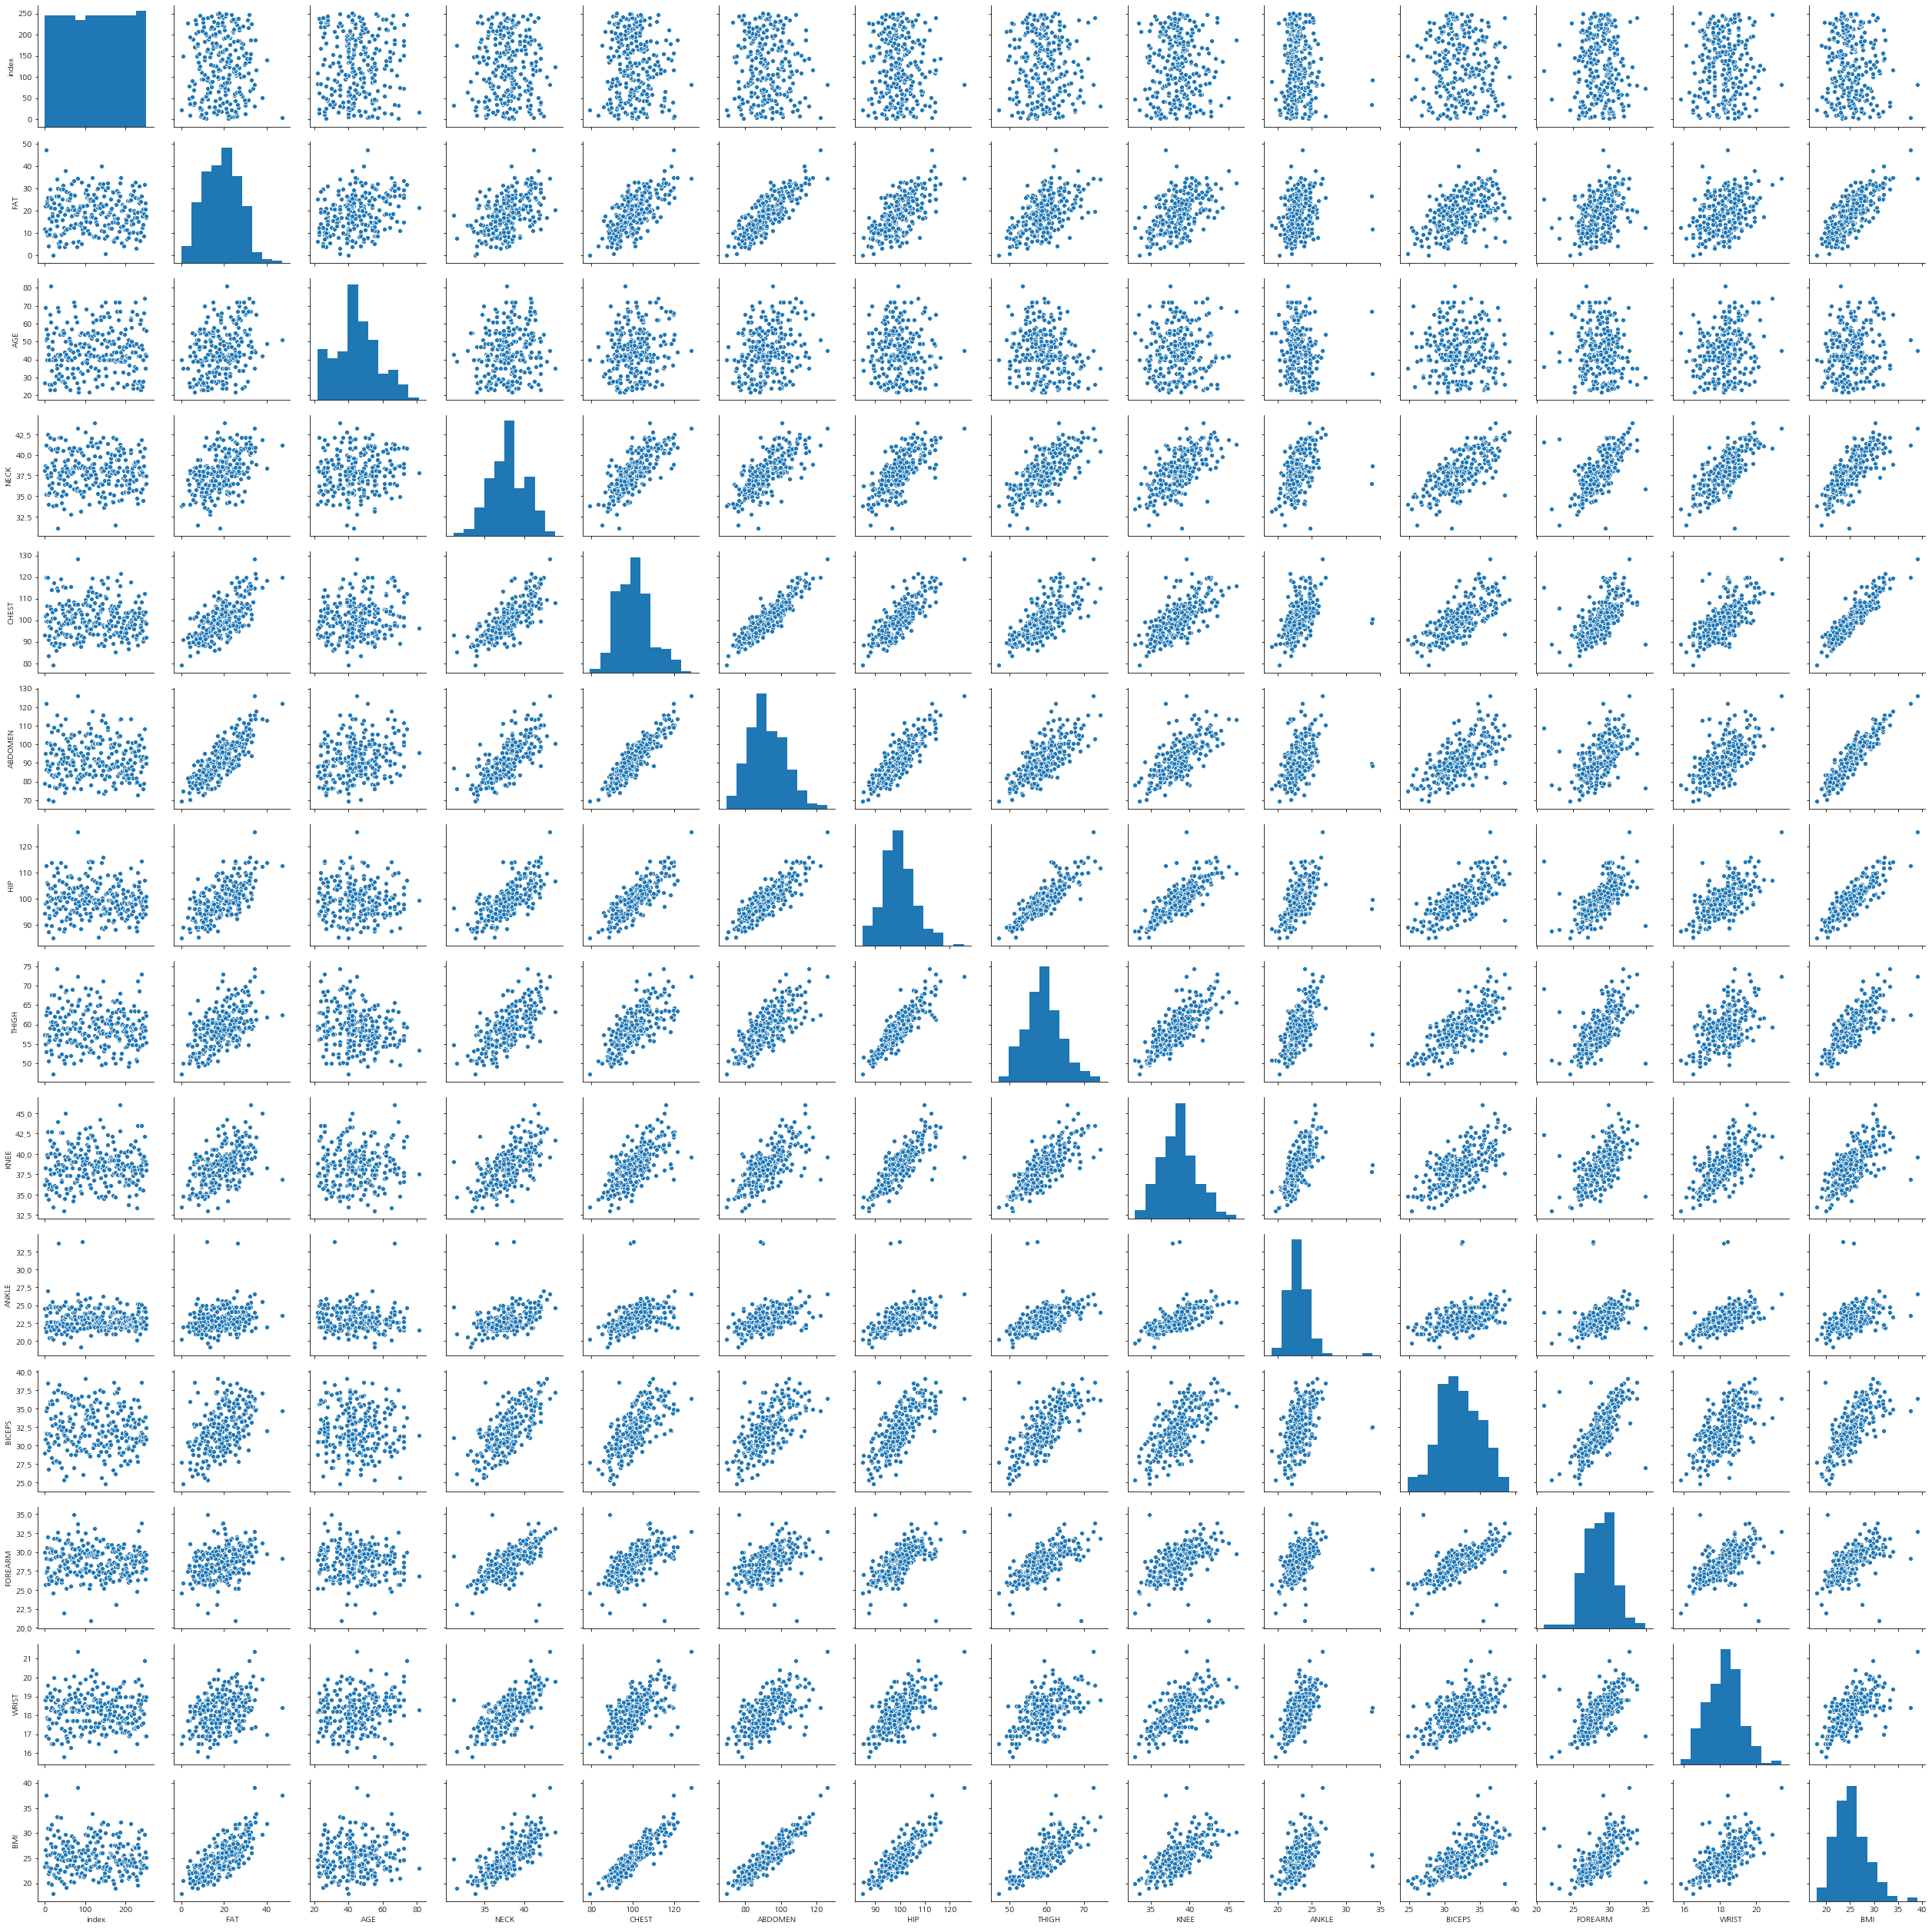

In [16]:
sns.pairplot(df)

In [17]:
df.corr().round(3)

,index,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
index,1.000,-0.010,0.022,-0.021,-0.035,-0.034,-0.060,-0.020,0.019,-0.072,-0.044,-0.020,-0.007,-0.060
FAT,-0.010,1.000,0.295,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.022,0.295,1.000,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
NECK,-0.021,0.489,0.119,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,-0.035,0.701,0.182,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,-0.034,0.824,0.243,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,-0.060,0.633,-0.058,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,-0.020,0.549,-0.216,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.019,0.492,0.017,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679
ANKLE,-0.072,0.245,-0.110,0.434,0.447,0.407,0.521,0.504,0.585,1.000,0.449,0.429,0.545,0.449


    변수간 상관계수를 구해본 결과
    FAT과 양의 상관이 높은 변수는 CHEST, ABDOMEN, HIP, BMIrk 있다.
    음의 상관이 높은 변수는 딱히 없는 듯 하다.

### 회귀 모델 생성(1) - 설명 변수 전체

In [18]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="FAT ~ AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI", data=df)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     59.44
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.81e-64
Time:                        21:29:52   Log-Likelihood:                -709.53
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     237   BIC:                             1491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      7.592      0.441      0.6

전체 변수를 넣어 회귀모델을 생성한 결과 수정된 결정계수 Adj.R-squared는 0.738로 꽤 높게 나왔지만, 각 변수들의 p-value의 값들이 유의수준 0.05를 넘어선 값들이 존재하므로 모델을 개선할 필요가 있다고 판단.

### 회귀 모델 생성 : 설명변수 간의 다중공선성 확인(1)

In [19]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_x = df.drop('FAT', axis=1)

# statsmodels의 상수항 추가 함수 적용
df_x_const = add_constant(df_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['varible'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i ) for i in range(df_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,varible,VIF
1,index,1.034
9,ANKLE,1.775
2,AGE,2.071
11,FOREARM,2.414
12,WRIST,3.105
10,BICEPS,3.299
3,NECK,3.682
8,KNEE,4.143
7,THIGH,7.094
4,CHEST,8.848


우선 가장 큰 VIF를 가진 ABDOMEN을 제거해보자

### 회귀 모델 생성(2) - ABDOMEN 제거

In [20]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="FAT ~ AGE+NECK+CHEST+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI", data=df)

#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     40.86
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.05e-48
Time:                        21:29:52   Log-Likelihood:                -750.52
No. Observations:                 250   AIC:                             1525.
Df Residuals:                     238   BIC:                             1567.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.7121      8.581     -1.948      0.0

    ABDOMEN을 뺀 후에 회귀모델을 생성한 결과 수정된 결정계수 Adj.R-squared는 0.638로 모든 변수를 넣어서 만들었을 때에 비해 감소한 것을 확인할 수 있었다.
    하지만 각 변수들의 p-value의 값들이 유의수준 0.05를 넘어선 값들이 존재하므로 모델을 개선할 필요가 있다고 판단.

### 회귀 모델 생성 : 설명변수 다중공선성 처리(2)

In [21]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_x = df.drop(['FAT','ABDOMEN'], axis=1)

# statsmodels의 상수항 추가 함수 적용
df_x_const = add_constant(df_x)

# DataFrame을 저장
df_vif = pd.DataFrame()
df_vif['varible'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i ) for i in range(df_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,varible,VIF
1,index,1.033
2,AGE,1.745
8,ANKLE,1.765
10,FOREARM,2.392
11,WRIST,3.055
9,BICEPS,3.263
3,NECK,3.662
7,KNEE,4.120
6,THIGH,7.077
4,CHEST,7.570


p-value > 0.05인 변수를 모두 제거해보자

### 회귀 모델 생성(3) - NECK, CHEST, HIP, KNEE, ANKLE, BICEPS, FOREARM, THIGH 제거

In [22]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="FAT ~ AGE+WRIST+BMI", data=df)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.32e-53
Time:                        21:29:52   Log-Likelihood:                -757.97
No. Observations:                 250   AIC:                             1524.
Df Residuals:                     246   BIC:                             1538.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8729      6.680     -0.280      0.7

### 회귀 모델 생성 : 설명변수 다중공선성 처리(3)

In [23]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_x = df.drop(['FAT','ABDOMEN'], axis=1)

# statsmodels의 상수항 추가 함수 적용
df_x_const = add_constant(df_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['varible'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i ) for i in range(df_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,varible,VIF
1,index,1.033
2,AGE,1.745
8,ANKLE,1.765
10,FOREARM,2.392
11,WRIST,3.055
9,BICEPS,3.263
3,NECK,3.662
7,KNEE,4.120
6,THIGH,7.077
4,CHEST,7.570


### 회귀모델 생성(4) - 후진제거법을 이용한 변수 선택(1)

In [34]:
# RFE(recursive feature elimination) function : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_y = df['FAT']

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select=5).fit(df_x, df_y)

# 선택된 변수
selected_cols = df_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]

print("Selected Varibles : {}".format(selected_cols))
print("Removed Varibles : {}".format(removed_cols))

Selected Varibles : Index(['AGE', 'NECK', 'HIP', 'WRIST', 'BMI'], dtype='object')
Removed Varibles : Index(['index', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM'], dtype='object')


In [25]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="FAT ~ AGE + NECK + HIP + WRIST + BMI", data=df)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     89.81
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.63e-53
Time:                        21:29:52   Log-Likelihood:                -752.62
No. Observations:                 250   AIC:                             1517.
Df Residuals:                     244   BIC:                             1538.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.4342      8.217     -1.757      0.0

### 회귀 모델 생성 : 설명변수 다중공선성 처리(4-1)

In [26]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF", inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.238
4,WRIST,2.443
2,NECK,3.169
3,HIP,4.846
5,BMI,5.047
0,const,683.020


NECK의 p-value가 0.48로 유의수준 0.05보다 크기때문에 제거 한 뒤에 모델을 만들어보자

### 회귀모델 생성(4) - 후진제거법을 이용한 변수 선택(2)

In [27]:
# RFE(recursive feature elimination) function : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_y = df['FAT']

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select=4).fit(df_x, df_y)

# 선택된 변수
selected_cols = df_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]

print("Selected Varibles : {}".format(selected_cols))
print("Removed Varibles : {}".format(removed_cols))

Selected Varibles : Index(['AGE', 'HIP', 'WRIST', 'BMI'], dtype='object')
Removed Varibles : Index(['index', 'NECK', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'FOREARM'],
      dtype='object')


In [28]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="FAT ~ AGE  + HIP + WRIST + BMI", data=df)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.98e-54
Time:                        21:29:52   Log-Likelihood:                -752.88
No. Observations:                 250   AIC:                             1516.
Df Residuals:                     245   BIC:                             1533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.9873      7.910     -2.021      0.0

### 회귀 모델 생성 : 설명변수 다중공선성 처리(4-2)

In [29]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF", inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.236
3,WRIST,1.856
4,BMI,4.410
2,HIP,4.838
0,const,634.163


### 오차의 기본 가정 검토
1. 정규성 2. 등분산성 3. 독립성

##### 등분산성 / 독립성 검정
잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성과 독립성을 만족한다.

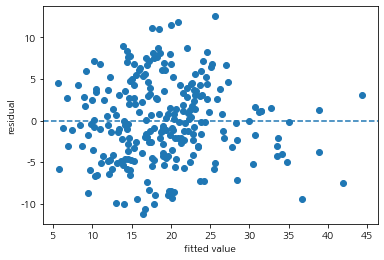

In [32]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

##### 정규성 검정
정규분포 직선(적색선)을 중심으로 분포하고 검정 통계량이 귀무가설을 채택하므로 정규분포를 따름

NormaltestResult(statistic=4.085636196319532, pvalue=0.12966279304593462)

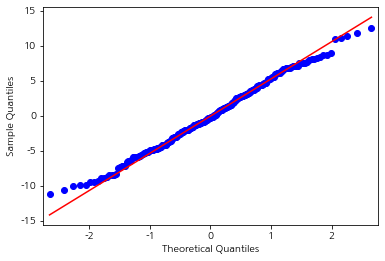

In [33]:
qqplot(reg_result.resid, line="q")
omni_normtest(reg_result.resid, axis=0)

모든 변수의 p-value가 유의수준 0.05보다 작고, 오차의 기본가정 3가지를 모두 만족하고, 수정된 결정계수 역시 0.641로 꽤 적합한 모델이기 때문에 **최종 회귀모델**로 선택하겠다.

## 최종 회귀식
### Yhat = -15.9873 + 0.1924AGE + 0.3430HIP -2.7051WRIST + 1.6406BMI

### 변수의 중요도 확인 (표준화 회귀 계수 사용)

In [30]:
scaler = StandardScaler()

cols= df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled['FAT'] = df['FAT']
reg_model_scaled = smf.ols(formula="FAT ~ AGE + HIP + WRIST + BMI", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.98e-54
Time:                        21:29:52   Log-Likelihood:                -752.88
No. Observations:                 250   AIC:                             1516.
Df Residuals:                     245   BIC:                             1533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0316      0.314     60.591      0.0

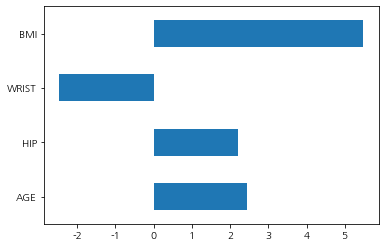

In [31]:
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_scaled_coef.plot.barh(y="Coef", legend=False)
plt.show()

## 결론

* BMI가 높을 수록 체질 비만도가 높음
* 손목이 얇을 수록 체질 비만도가 낮음